In [1]:
#read in excel
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data = pd.read_excel("/home/idies/workspace/Storage/madisonleblanc/persistent/reductions_ASTR4261/data (6).xlsx")


<ErrorbarContainer object of 3 artists>

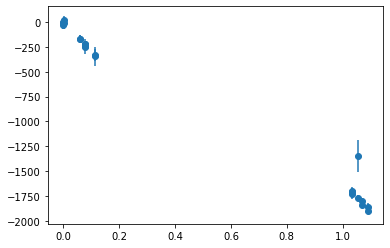

In [2]:
#convert uncert of dec and RA to radians
data['uncert (dec)'] = data['uncert (dec)']*(np.pi/180)
data['uncert (RA)'] = data['uncert (RA)']*(np.pi/180)

derr = data['uncert (dec)']*206265*1000
RAerr = data['uncert (RA)']*206265*1000
#convert dec to radians
data["dec_rad"]= np.pi/180*data['dec']
dec = data['dec_rad']

dec_corr=(dec - dec[0])*206265*1000

#plot dec v time to check that it looks ok
xdata = data["time (years)"]

plt.errorbar(xdata, dec_corr,yerr = derr, fmt = 'o')


<ErrorbarContainer object of 3 artists>

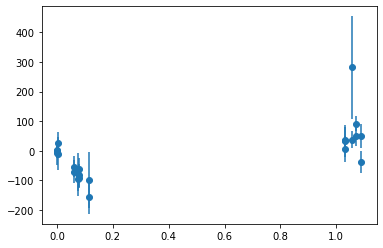

In [3]:
#convert RA to radians
data["RA_rad"] = (np.pi/180)*data['RA']
RA = data["RA_rad"]

#convert right ascension to mas and correct with cos(dec)
RA_corr = (RA - RA[0])*np.cos(dec)*206265*1000

#plot RA vs time
plt.errorbar(xdata,RA_corr, yerr = RAerr, fmt = 'o')

[-1647.58128977   -51.46223576]
[[ 416.0425916  -213.77763827]
 [-213.77763827  218.20865972]]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<function matplotlib.pyplot.show(close=None, block=None)>

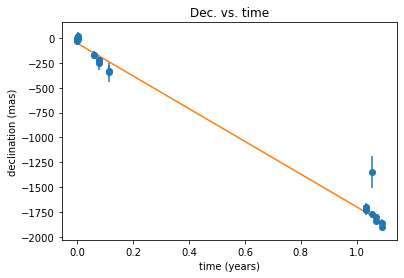

In [20]:
import scipy.optimize as opt
import numpy as np
from IPython.display import display,Math

#define first function to fit to data
def f1(x, m, c):
    return m*x + c

#fit to declination data
s1p,s1cov = opt.curve_fit(f1, xdata, dec_corr, sigma = derr)

print(s1p)
print(s1cov)

#m = proper motion (dec)
display(Math(r'$m=%7.4f\pm%7.4f$' % (s1p[0],np.sqrt(s1cov[0,0]))))
display(Math(r'$c=%7.4f\pm%7.4f$' % (s1p[1],np.sqrt(s1cov[1,1]))))

plt.errorbar(xdata, dec_corr, yerr = derr, fmt = 'o')
plt.plot(xdata,f1(xdata, *s1p))
plt.title("Dec. vs. time")
plt.xlabel("time (years)")
plt.ylabel("declination (mas)")
plt.show

[ 74.33224734 -38.76380797]
[[ 398.33032476 -175.97267556]
 [-175.97267556  178.27857328]]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<function matplotlib.pyplot.show(close=None, block=None)>

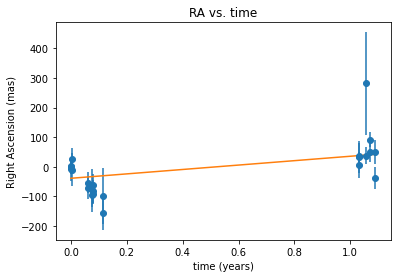

In [5]:
#define second funtion
def f2(x, m, c):
    return m*x + c

#use curve fit to fit f2 to RA
s2p,s2cov = opt.curve_fit(f2, xdata, RA_corr, p0 = [115.0, 0],sigma = RAerr)
#s2p,s2cov = opt.curve_fit(f2, xdata, RA - RA[0])
print(s2p)
print(s2cov)

#m = proper motion of RA inn mas/year
display(Math(r'$m=%7.4f\pm%7.4f$' % (s2p[0],np.sqrt(s2cov[0,0]))))
display(Math(r'$c=%7.4f\pm%7.4f$' % (s2p[1],np.sqrt(s2cov[1,1]))))

#print(s2p[0]*3600*np.cos(data['dec'][0])*1000)

plt.errorbar(xdata,RA_corr, yerr = RAerr, fmt = 'o')
plt.plot(xdata,f2(xdata, *s2p))
plt.title("RA vs. time")
plt.xlabel("time (years)")
plt.ylabel("Right Ascension (mas)")
plt.show

In [6]:
#take cos and sine of dec (radians) and RA (radians)
data["cos(dec)_rad"] = np.cos(data['dec_rad'])
data["sin(dec)_rad"] = np.sin(data['dec_rad'])
data["sin(RA)_rad"] = np.sin(data['RA_rad'])
data["cos(RA)_rad"] = np.cos(data['RA_rad'])

In [7]:
data

,date (calendar),date (JD),time (years),Image name,platesolve,RA,dec,uncert (RA),uncert (dec),AIRMASS,...,V-R,Class (S/P),InstMag,Error,dec_rad,RA_rad,cos(dec)_rad,sin(dec)_rad,sin(RA)_rad,cos(RA)_rad
0,2020-10-20,2459142.5,0.000000,HH_And-001V,True,355.480255,44.168398,1.190315e-07,1.895428e-07,1.147577,...,NaN,NaN,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078803,0.99689
1,2020-10-20,2459142.5,0.000000,HH_And_001V,True,355.480257,44.168396,1.172861e-07,1.192060e-07,1.139697,...,NaN,NaN,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078803,0.99689
2,2020-10-20,2459142.5,0.000000,HH_And_002V,True,355.480252,44.168391,1.968731e-07,2.000147e-07,1.137308,...,NaN,NaN,NaN,NaN,0.770884,6.204301,0.717295,0.696769,-0.078803,0.99689
3,2020-10-21,2459143.5,0.002738,HH_And-001V,True,355.480251,44.168395,2.693043e-07,2.733186e-07,1.101657,...,NaN,NaN,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078803,0.99689
4,2020-10-21,2459143.5,0.002738,HH_And-001R,True,355.480265,44.168404,1.802925e-07,1.830850e-07,1.099894,...,NaN,NaN,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078802,0.99689
5,2020-11-11,2459164.5,0.060232,HH_And-001R,True,355.480228,44.168350,1.912881e-07,1.946042e-07,1.034395,...,NaN,NaN,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689
6,2020-11-11,2459164.5,0.060232,HH_And-002R,True,355.480235,44.168351,1.685988e-07,1.713913e-07,1.034184,...,NaN,NaN,NaN,NaN,0.770883,6.204301,0.717296,0.696769,-0.078803,0.99689
7,2020-11-17,2459170.5,0.076659,HH_And_0000_002R,True,355.480219,44.168330,2.021091e-07,2.055998e-07,1.032538,...,NaN,NaN,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689
8,2020-11-17,2459170.5,0.076659,HH_And_0000_001R,True,355.480224,44.168329,3.485423e-07,3.546509e-07,1.032269,...,NaN,NaN,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689
9,2020-11-18,2459171.5,0.079397,HH_And_0000_001R,True,355.480232,44.168336,1.713913e-07,1.743584e-07,1.040338,...,NaN,NaN,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689


Proper motions are just the rate of change of a star’s position with time. But again, motions in 
spherical coordinates cause us to have to take care with how we report proper motion. We need 
to multiply the rate of change of the right ascension coordinate by cos dec to get a meaningful 
quantity that is coordinate-system invariant.


In [8]:
#epsilon in radians
eps = (0.4101524)

#Beta and Lambda in radians 
data["Beta"] = np.arcsin((data["sin(dec)_rad"]*np.cos(eps)) - (data["cos(dec)_rad"]*np.sin(eps)*data["sin(RA)_rad"]))
data['lambda'] = np.arccos((data['cos(RA)_rad']*data['cos(dec)_rad'])/(np.cos(data['Beta'])))

In [9]:
#convert beta and lambda to mas
Beta = data['Beta']*206265*1000
Lam = data['lambda']*206265*1000

In [10]:
#uncerts of lambda and beta
cosRA = data['cos(RA)_rad']
sinRA = data['sin(RA)_rad']
cosD = data['cos(dec)_rad']
sinD = data['sin(dec)_rad']
#secB = np.arccos(data['Beta'])
#tanB = np.tan(data['Beta'])

#parRAb = -((np.sin(eps)*cosD*cosRA)/(np.sqrt(1-(np.cos(eps)**2)*(sinD**2)+np.sin(2*eps)*cosD*sinRA-(np.sin(eps)**2)*(cosD**2)*(sinRA**2))))
#parDb = -((np.sin(eps)*cosD + np.sin(eps)*sinD*sinRA)/(np.sqrt(1-(np.cos(eps)**2)*(sinD**2)+np.sin(2*eps)*cosD*sinRA-(np.sin(eps)**2)*(cosD**2)*(sinRA**2))))

#data['beta err'] = np.sqrt(((parRAb*data['uncert (RA)'])**2) + ((parDb*data['uncert (dec)']**2)))

#parRAl = (secB*sinRA*cosD)/(np.sqrt(1-(secB*cosRA*cosD)**2))
#parDl = (secB*cosRA*sinD)/(np.sqrt(1-(secB*cosRA*cosD)**2))
#parBl = -((secB*tanB*cosRA*cosD)/(np.sqrt(1- (secB*cosRA*cosD)**2)))

#data['lam err'] = np.sqrt((parRAl*data['uncert (RA)'])**2 + (parDl*data['uncert (dec)'])**2 +(parBl*data['beta err']))

data

,date (calendar),date (JD),time (years),Image name,platesolve,RA,dec,uncert (RA),uncert (dec),AIRMASS,...,InstMag,Error,dec_rad,RA_rad,cos(dec)_rad,sin(dec)_rad,sin(RA)_rad,cos(RA)_rad,Beta,lambda
0,2020-10-20,2459142.5,0.000000,HH_And-001V,True,355.480255,44.168398,1.190315e-07,1.895428e-07,1.147577,...,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078803,0.99689,0.722842,0.306120
1,2020-10-20,2459142.5,0.000000,HH_And_001V,True,355.480257,44.168396,1.172861e-07,1.192060e-07,1.139697,...,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078803,0.99689,0.722842,0.306120
2,2020-10-20,2459142.5,0.000000,HH_And_002V,True,355.480252,44.168391,1.968731e-07,2.000147e-07,1.137308,...,NaN,NaN,0.770884,6.204301,0.717295,0.696769,-0.078803,0.99689,0.722842,0.306120
3,2020-10-21,2459143.5,0.002738,HH_And-001V,True,355.480251,44.168395,2.693043e-07,2.733186e-07,1.101657,...,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078803,0.99689,0.722842,0.306120
4,2020-10-21,2459143.5,0.002738,HH_And-001R,True,355.480265,44.168404,1.802925e-07,1.830850e-07,1.099894,...,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078802,0.99689,0.722842,0.306120
5,2020-11-11,2459164.5,0.060232,HH_And-001R,True,355.480228,44.168350,1.912881e-07,1.946042e-07,1.034395,...,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689,0.722842,0.306119
6,2020-11-11,2459164.5,0.060232,HH_And-002R,True,355.480235,44.168351,1.685988e-07,1.713913e-07,1.034184,...,NaN,NaN,0.770883,6.204301,0.717296,0.696769,-0.078803,0.99689,0.722842,0.306119
7,2020-11-17,2459170.5,0.076659,HH_And_0000_002R,True,355.480219,44.168330,2.021091e-07,2.055998e-07,1.032538,...,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689,0.722841,0.306119
8,2020-11-17,2459170.5,0.076659,HH_And_0000_001R,True,355.480224,44.168329,3.485423e-07,3.546509e-07,1.032269,...,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689,0.722841,0.306119
9,2020-11-18,2459171.5,0.079397,HH_And_0000_001R,True,355.480232,44.168336,1.713913e-07,1.743584e-07,1.040338,...,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689,0.722841,0.306119


Text(0, 0.5, 'lambda')

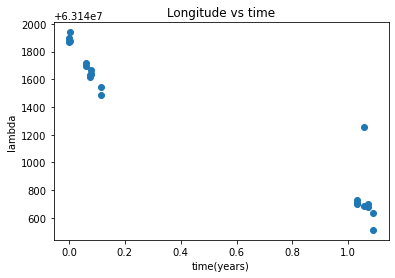

In [11]:
plt.scatter(xdata,Lam)
plt.title("Longitude vs time")
plt.xlabel("time(years)")
plt.ylabel('lambda')

Text(0, 0.5, 'Beta')

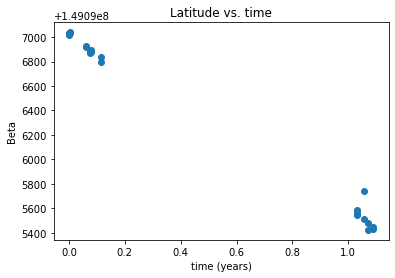

In [12]:
plt.scatter(xdata,Beta)
plt.title("Latitude vs. time")
plt.xlabel("time (years)")
plt.ylabel('Beta')

HH And, apparent mag = 12.29

def wave(x,a,b,m,c):
    return c + m*x + a*np.sin(2*np.pi*x) + b*np.cos(2*np.pi*x)

s3p,s3cov = opt.curve_fit(wave, xdata, Lam)

#print(s3p[1])
#print(s3cov)

display(Math(r'$a=%7.4f\pm%7.4f$' % (s3p[0],np.sqrt(s3cov[0,0]))))
display(Math(r'$b=%7.4f\pm%7.4f$' % (s3p[1],np.sqrt(s3cov[1,1]))))

err1 = s3cov[0,0]
err2 = s3cov[1,1]
A = s3p[0]
B = s3p[1]

long = np.sqrt((s3p[0]*s3p[0]) + (s3p[1]*s3p[1]))
err = np.sqrt((A**2*err1 +B**2*err2)/((A**2 + B**2)))
print("Parallax = ",long, "err = ", err)

In [13]:
data

,date (calendar),date (JD),time (years),Image name,platesolve,RA,dec,uncert (RA),uncert (dec),AIRMASS,...,InstMag,Error,dec_rad,RA_rad,cos(dec)_rad,sin(dec)_rad,sin(RA)_rad,cos(RA)_rad,Beta,lambda
0,2020-10-20,2459142.5,0.000000,HH_And-001V,True,355.480255,44.168398,1.190315e-07,1.895428e-07,1.147577,...,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078803,0.99689,0.722842,0.306120
1,2020-10-20,2459142.5,0.000000,HH_And_001V,True,355.480257,44.168396,1.172861e-07,1.192060e-07,1.139697,...,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078803,0.99689,0.722842,0.306120
2,2020-10-20,2459142.5,0.000000,HH_And_002V,True,355.480252,44.168391,1.968731e-07,2.000147e-07,1.137308,...,NaN,NaN,0.770884,6.204301,0.717295,0.696769,-0.078803,0.99689,0.722842,0.306120
3,2020-10-21,2459143.5,0.002738,HH_And-001V,True,355.480251,44.168395,2.693043e-07,2.733186e-07,1.101657,...,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078803,0.99689,0.722842,0.306120
4,2020-10-21,2459143.5,0.002738,HH_And-001R,True,355.480265,44.168404,1.802925e-07,1.830850e-07,1.099894,...,NaN,NaN,0.770884,6.204301,0.717295,0.696770,-0.078802,0.99689,0.722842,0.306120
5,2020-11-11,2459164.5,0.060232,HH_And-001R,True,355.480228,44.168350,1.912881e-07,1.946042e-07,1.034395,...,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689,0.722842,0.306119
6,2020-11-11,2459164.5,0.060232,HH_And-002R,True,355.480235,44.168351,1.685988e-07,1.713913e-07,1.034184,...,NaN,NaN,0.770883,6.204301,0.717296,0.696769,-0.078803,0.99689,0.722842,0.306119
7,2020-11-17,2459170.5,0.076659,HH_And_0000_002R,True,355.480219,44.168330,2.021091e-07,2.055998e-07,1.032538,...,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689,0.722841,0.306119
8,2020-11-17,2459170.5,0.076659,HH_And_0000_001R,True,355.480224,44.168329,3.485423e-07,3.546509e-07,1.032269,...,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689,0.722841,0.306119
9,2020-11-18,2459171.5,0.079397,HH_And_0000_001R,True,355.480232,44.168336,1.713913e-07,1.743584e-07,1.040338,...,NaN,NaN,0.770883,6.204300,0.717296,0.696769,-0.078803,0.99689,0.722841,0.306119


In [14]:
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon

#finding coordinates of sun each night
t = Time(data['date (JD)'], format = 'jd')
loc = EarthLocation.of_site('McDonald Observatory')

with solar_system_ephemeris.set('builtin'):
    sun= get_body('sun', t, loc)
    data['sun (RA)'] = sun.ra.rad
    data['sun (dec)'] = sun.dec.rad

In [15]:
#beta of sun
data['bet_sun'] = np.arcsin((np.sin(data["sun (dec)"])*np.cos(eps)) - (np.cos(data['sun (dec)'])*np.sin(eps)*np.sin(data['sun (RA)'])))

#lambda of sun
data['lam_sun'] = np.arccos(np.cos((data['sun (RA)'])*np.cos(data['sun (dec)']))/(np.cos(data['bet_sun'])))

#lambda star minus lambda sun
data['lam_corr'] = data['lambda'] - data['lam_sun']
    

In [16]:
data

,date (calendar),date (JD),time (years),Image name,platesolve,RA,dec,uncert (RA),uncert (dec),AIRMASS,...,sin(dec)_rad,sin(RA)_rad,cos(RA)_rad,Beta,lambda,sun (RA),sun (dec),bet_sun,lam_sun,lam_corr
0,2020-10-20,2459142.5,0.000000,HH_And-001V,True,355.480255,44.168398,1.190315e-07,1.895428e-07,1.147577,...,0.696770,-0.078803,0.99689,0.722842,0.306120,3.575078,-0.180145,0.000467,2.765961,-2.459840
1,2020-10-20,2459142.5,0.000000,HH_And_001V,True,355.480257,44.168396,1.172861e-07,1.192060e-07,1.139697,...,0.696770,-0.078803,0.99689,0.722842,0.306120,3.575078,-0.180145,0.000467,2.765961,-2.459840
2,2020-10-20,2459142.5,0.000000,HH_And_002V,True,355.480252,44.168391,1.968731e-07,2.000147e-07,1.137308,...,0.696769,-0.078803,0.99689,0.722842,0.306120,3.575078,-0.180145,0.000467,2.765961,-2.459840
3,2020-10-21,2459143.5,0.002738,HH_And-001V,True,355.480251,44.168395,2.693043e-07,2.733186e-07,1.101657,...,0.696770,-0.078803,0.99689,0.722842,0.306120,3.591548,-0.186386,0.000484,2.753841,-2.447721
4,2020-10-21,2459143.5,0.002738,HH_And-001R,True,355.480265,44.168404,1.802925e-07,1.830850e-07,1.099894,...,0.696770,-0.078802,0.99689,0.722842,0.306120,3.591548,-0.186386,0.000484,2.753841,-2.447721
5,2020-11-11,2459164.5,0.060232,HH_And-001R,True,355.480228,44.168350,1.912881e-07,1.946042e-07,1.034395,...,0.696769,-0.078803,0.99689,0.722842,0.306119,3.949776,-0.303763,0.000804,2.514240,-2.208121
6,2020-11-11,2459164.5,0.060232,HH_And-002R,True,355.480235,44.168351,1.685988e-07,1.713913e-07,1.034184,...,0.696769,-0.078803,0.99689,0.722842,0.306119,3.949776,-0.303763,0.000804,2.514240,-2.208121
7,2020-11-17,2459170.5,0.076659,HH_And_0000_002R,True,355.480219,44.168330,2.021091e-07,2.055998e-07,1.032538,...,0.696769,-0.078803,0.99689,0.722841,0.306119,4.057011,-0.331068,0.000875,2.446488,-2.140369
8,2020-11-17,2459170.5,0.076659,HH_And_0000_001R,True,355.480224,44.168329,3.485423e-07,3.546509e-07,1.032269,...,0.696769,-0.078803,0.99689,0.722841,0.306119,4.057011,-0.331068,0.000875,2.446488,-2.140369
9,2020-11-18,2459171.5,0.079397,HH_And_0000_001R,True,355.480232,44.168336,1.713913e-07,1.743584e-07,1.040338,...,0.696769,-0.078803,0.99689,0.722841,0.306119,4.075098,-0.335286,0.000885,2.435004,-2.128885


In [17]:
data['t+'] = data['time (years)'] + 10
d1 = [data['time (years)'], data['t+']]

#df2 = pd.DataFrame(data['time (years)'].append(df1))

d2 = [data['lambda']*np.cos(data['Beta']), data['Beta']]

data['l+'] = data['lam_corr'] + 13
d3 = [data['lam_corr'], data['l+']]

df = pd.concat(d1)
df2 = pd.concat(d2)
df3 = pd.concat(d3)

df.reset_index(drop = True, inplace = True)
df2.reset_index(drop = True, inplace = True)
df3.reset_index(drop = True, inplace = True)

df4 = pd.DataFrame(df)
df4['data'] = pd.DataFrame(df2)
df4['time'] = df4[0]
df4['lcorr'] = df3
 
#df2['val'] = lam.(data['Beta'])

#df2['val'] = data['lambda'].append(data['Beta'])


#df2["time"] = df2[0]
df4

,0,data,time,lcorr
0,0.000000,0.229568,0.000000,-2.459840
1,0.000000,0.229568,0.000000,-2.459840
2,0.000000,0.229568,0.000000,-2.459840
3,0.002738,0.229568,0.002738,-2.447721
4,0.002738,0.229569,0.002738,-2.447721
5,0.060232,0.229568,0.060232,-2.208121
6,0.060232,0.229568,0.060232,-2.208121
7,0.076659,0.229567,0.076659,-2.140369
8,0.076659,0.229568,0.076659,-2.140369
9,0.079397,0.229568,0.079397,-2.128885


In [18]:
def func(t, lam0, bet0, mul, mub, w):
    mask = (t < 9.0)
    y = bet0 + mub*t + w*np.cos(df4['lcorr'])*np.sin(bet0)
    y[mask] = lam0 + mul*t[mask] + w*np.sin(df4['lcorr'])
    return y
s5p,s5cov = opt.curve_fit(func, df4['time'], df4['data'])

display(Math(r'$lam0=%7.4f\pm%7.4f$' % (s5p[0],np.sqrt(s5cov[0,0]))))
display(Math(r'$bet0=%7.4f\pm%7.4f$' % (s5p[1],np.sqrt(s5cov[1,1]))))
display(Math(r'$mul=%7.4f\pm%7.4f$' % (s5p[2]*206265*1000,np.sqrt(s5cov[2,2])*206265*1000)))
display(Math(r'$mub=%7.4f\pm%7.4f$' % (s5p[3]*206265*1000,np.sqrt(s5cov[3,3])*206265*1000)))
display(Math(r'$w=%7.4f\pm%7.4f$' % (s5p[4]*206265*1000,np.sqrt(s5cov[4,4])*206265*1000)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0.5, 1.0, 'Parallax')

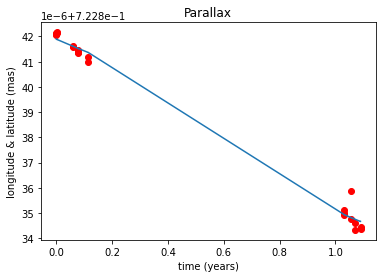

In [23]:
df4['timecorr']  = df4['time'][23:]-10
plt.scatter(df4['timecorr'], df4['data'], c = "r")
plt.plot(df4['timecorr'], func(df4['time'], *s5p))
plt.xlabel("time (years)")
plt.ylabel('longitude & latitude (mas)')
plt.title("Parallax")